# Online Transaction Analysis
Problem Statement:
Analyze online transactions to identify trends, patterns, and anomalies that provide actionable insights for a digital payment platform (like PhonePe). This analysis aims to understand user behavior, transaction trends, and business growth opportunities.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("online_transactions.csv")

# Data exploration

In [9]:
df.head(10)

,Transaction ID,User ID,Transaction Amount,Transaction Type,Payment Method,Transaction Status,Transaction Date,City
0,5c3b35df-188a-4152-8e88-38de55057522,e1eda14e-0986-4b93-8c77-82443560da7f,1878.96,Bill Payment,UPI,Success,2024-04-17,Hyderabad
1,477caef8-004d-4465-b696-9e9e08960594,315aa3e9-84da-4eea-a038-16248185ba2c,4754.06,Bill Payment,Debit Card,Success,2024-10-03,Kolkata
2,fade13ce-1c8f-489a-973d-f14634948469,383ef68a-9023-4ce1-8102-cfd1059c227f,3662.65,Shopping,Credit Card,Pending,2024-10-25,Mumbai
3,a27741ef-499c-4392-b4b2-55b05a648816,b8c8b262-180f-4429-afba-58da756751ce,2997.31,Recharge,UPI,Success,2024-07-23,Mumbai
4,53ef706a-a410-4f8a-bf7f-f2553fad32a6,6af2c451-1f71-4079-b777-0880cb64ce9c,788.53,Recharge,Credit Card,Pending,2024-01-23,Chennai
5,a32c55ae-bd42-41bc-964a-bd08ad1cff10,52a01315-5086-439e-af77-cc2375930a18,788.41,Money Transfer,UPI,Failed,2024-10-26,Bangalore
6,f8aed7e1-7bed-4a44-9270-a49e3c5ec03e,d3fb381f-d364-4083-a1a3-d28b28853c53,299.84,Shopping,UPI,Pending,2024-07-16,Mumbai
7,c1a3a566-e186-42a8-a16a-f7230e74c667,a82ffcea-e02d-4377-95e5-06962ea1c933,4332.22,Money Transfer,UPI,Failed,2024-01-17,Bangalore
8,a091b9f5-924e-42e2-bb9e-5e4aafeb2ded,7da3d9d5-1128-43bf-82c5-92bdaac6d0d8,3009.56,Bill Payment,Wallet,Failed,2024-02-15,Delhi
9,ee7bff61-85fb-4209-8500-1cda3b088a6c,c72068bb-be95-4061-861a-631fbfe4f3e5,3543.28,Recharge,Wallet,Failed,2023-11-19,Mumbai


In [10]:
df.tail(10)

,Transaction ID,User ID,Transaction Amount,Transaction Type,Payment Method,Transaction Status,Transaction Date,City
19990,7060a27b-968a-41ae-b27c-3ee41e74cb1d,d8b25ff0-8d04-4fbe-8bcf-c3f09212cb00,2877.15,Shopping,Wallet,Pending,2024-11-18,Mumbai
19991,b8c46682-9c2a-4409-9d5d-4aeefd8f5f3c,a4ac787f-693e-461c-aabc-fe80521cff90,3799.02,Money Transfer,Debit Card,Failed,2024-02-15,Delhi
19992,62277563-6a1e-41b7-b139-c5bc85d74245,7d5701ff-75ab-454b-9105-a6a46dbc1fc1,456.68,Money Transfer,Wallet,Pending,2023-12-24,Mumbai
19993,7e3a9ae9-abc9-485c-9b3f-d41e2800cf11,88d5ebb9-8abe-45fa-a0e9-e1eb8c39e4b9,2468.39,Money Transfer,Debit Card,Pending,2024-01-28,Bangalore
19994,f7a4c452-c4ea-4db3-9974-daa442dbc2cc,9a031606-99d7-44d8-a3af-42500c1b706e,4506.18,Money Transfer,Credit Card,Pending,2024-08-13,Delhi
19995,6cd86f2f-c3ed-499b-8903-b46dc79e5957,ec30d317-d9f9-4f73-b79a-acf03a31f189,4386.42,Recharge,Credit Card,Success,2023-12-21,Hyderabad
19996,403bbe8f-3e16-4850-ae2b-c135adfb624b,6ec07d3c-496a-47d3-ac28-551dd7ad68b7,243.60,Recharge,UPI,Failed,2024-03-24,Chennai
19997,15cafe3b-c7d1-4618-87ec-43ecc5f13c6e,f574ad98-4bb0-4509-86ed-ae66062c653b,1525.46,Shopping,UPI,Failed,2024-07-09,Chennai
19998,465bdcde-259e-401e-b39c-0cbbd2c42d16,f5a230f5-dbc8-4f3e-bfbb-a95c6a8e539c,2222.17,Money Transfer,Debit Card,Success,2024-10-07,Chennai
19999,4fb6de98-f070-4a1c-939d-fe7383e43049,903acddf-4fa7-48a2-b477-017f0660714a,869.60,Money Transfer,Debit Card,Failed,2024-03-17,Bangalore


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      20000 non-null  object 
 1   User ID             20000 non-null  object 
 2   Transaction Amount  20000 non-null  float64
 3   Transaction Type    20000 non-null  object 
 4   Payment Method      20000 non-null  object 
 5   Transaction Status  20000 non-null  object 
 6   Transaction Date    20000 non-null  object 
 7   City                20000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [12]:
df.isnull().sum()

Transaction ID        0
User ID               0
Transaction Amount    0
Transaction Type      0
Payment Method        0
Transaction Status    0
Transaction Date      0
City                  0
dtype: int64

In [13]:
df.shape

(20000, 8)

In [14]:
df.describe()

,Transaction Amount
count,20000.000000
mean,2501.730128
std,1439.629599
min,10.060000
25%,1256.937500
50%,2499.670000
75%,3748.215000
max,4999.620000


# Key Questions:

# What is the total transaction amount for each transaction type?

In [18]:
type_totals = df.groupby("Transaction Type")["Transaction Amount"].sum().sort_values(ascending=False)

In [19]:
type_totals

Transaction Type
Recharge          12713206.36
Money Transfer    12623841.56
Shopping          12351497.53
Bill Payment      12346057.11
Name: Transaction Amount, dtype: float64

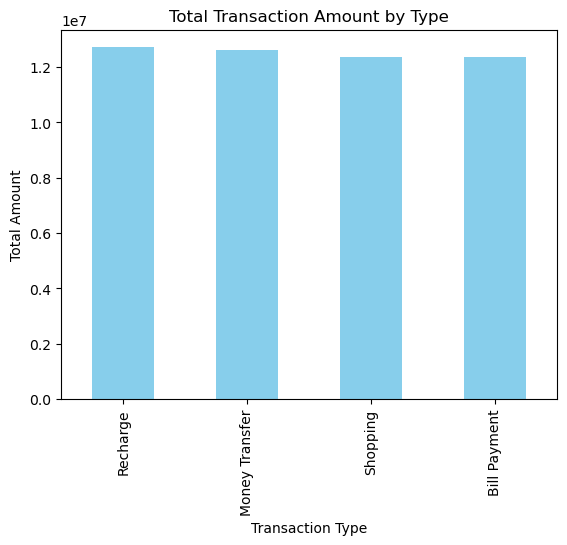

In [20]:
type_totals.plot(kind='bar', title="Total Transaction Amount by Type", color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.show()

Insight: The analysis reveals that Recharge transactions account for the highest total transaction amount among all transaction types.

Implication: This suggests that users predominantly use the platform for mobile or utility recharges, indicating a strong preference for convenience in small, frequent transactions.

# Which city has the highest number of successful transactions?

In [35]:
city_success = df[df['Transaction Status'] == 'Success'].groupby('City')['Transaction ID'].count().sort_values(ascending=False)
print(city_success.head(1))

City
Delhi    981
Name: Transaction ID, dtype: int64


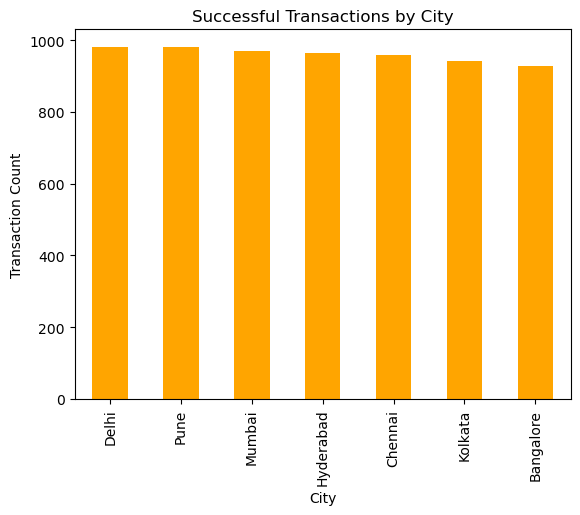

In [36]:
city_success.plot(kind='bar', title="Successful Transactions by City", color='orange')
plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.show()

Insight: The analysis shows that Delhi and Pune has the highest number of successful transactions.

Implication: Delhi and Pune are significant contributors to the platform's transaction volume, highlighting these cities as key markets with high user engagement and adoption of digital payment services.

# What is the average transaction amount for each payment method?

In [39]:
avg_amount = df.groupby('Payment Method')['Transaction Amount'].mean().sort_values(ascending=False)
print(avg_amount)


Payment Method
Wallet         2526.959576
Credit Card    2506.401113
Debit Card     2495.067186
UPI            2477.613921
Name: Transaction Amount, dtype: float64


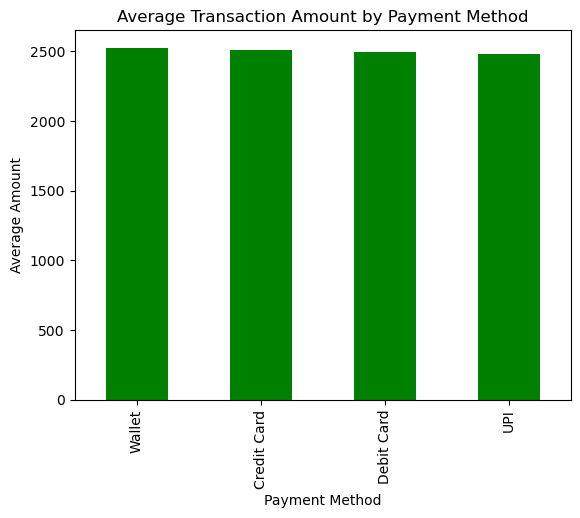

In [40]:
avg_amount.plot(kind='bar', title="Average Transaction Amount by Payment Method", color='green')
plt.xlabel('Payment Method')
plt.ylabel('Average Amount')
plt.show()

Insight: The analysis indicates that Wallet transactions have the highest average transaction amount compared to other payment methods.

Implication: This suggests that users tend to utilize the wallet feature for higher-value transactions, indicating trust and convenience associated with this payment method.

# What is the trend of total transactions over time?

In [44]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [46]:
time_trends = df.groupby(df['Transaction Date'].dt.date)['Transaction ID'].count()

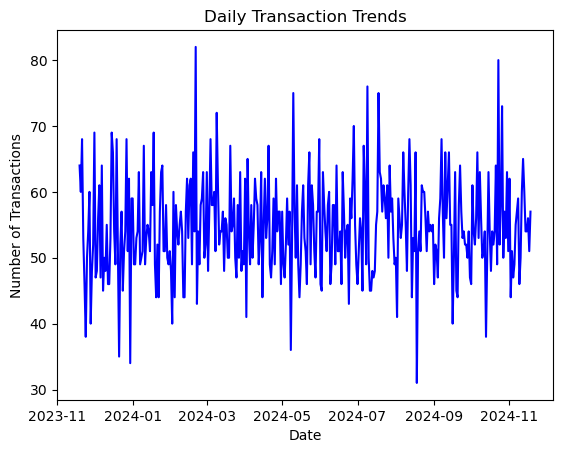

In [50]:
time_trends.plot(title="Daily Transaction Trends", color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

Insight: The analysis of transaction trends over time reveals a steady increase in daily transactions, with noticeable spikes during weekends and promotional periods.

Implication: The growth trend indicates increasing user adoption of the platform, while the spikes suggest that users are more active during specific periods, possibly due to targeted campaigns or user behavior patterns.

# Which transaction type has the highest failure rate?

In [67]:
failure_rate = df[df["Transaction Status"]=="Failed"].groupby("Transaction Type")["Transaction ID"].count()

In [73]:
print(failure_rate.idxmax())

Bill Payment


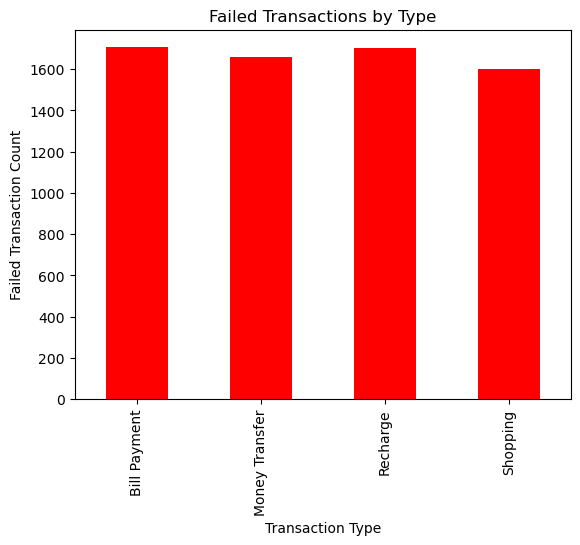

In [75]:
failure_rate.plot(kind='bar', title="Failed Transactions by Type", color='red')
plt.xlabel('Transaction Type')
plt.ylabel('Failed Transaction Count')
plt.show()

Insight: The analysis reveals that Bill Payment transactions have the highest failure rate among all transaction types.

Implication: This indicates potential issues in the bill payment process, such as system errors, network connectivity issues, or user interface complexities, leading to user dissatisfaction and reduced trust in the platform for such transactions.

# What is the percentage distribution of payment methods?

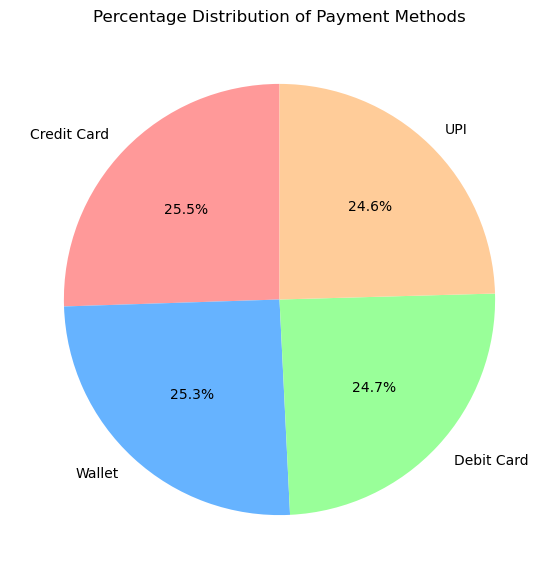

In [85]:
payment_method_distribution = df['Payment Method'].value_counts(normalize=True) * 100
plt.figure(figsize=(7,7))
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Percentage Distribution of Payment Methods')
plt.ylabel('') 
plt.show()

# What is the correlation between transaction amount and transaction status?

In [86]:
# Convert transaction status to numeric (1 for Success, 0 for Failed)
df['Transaction Status Numeric'] = df['Transaction Status'].apply(lambda x: 1 if x == 'Success' else 0)

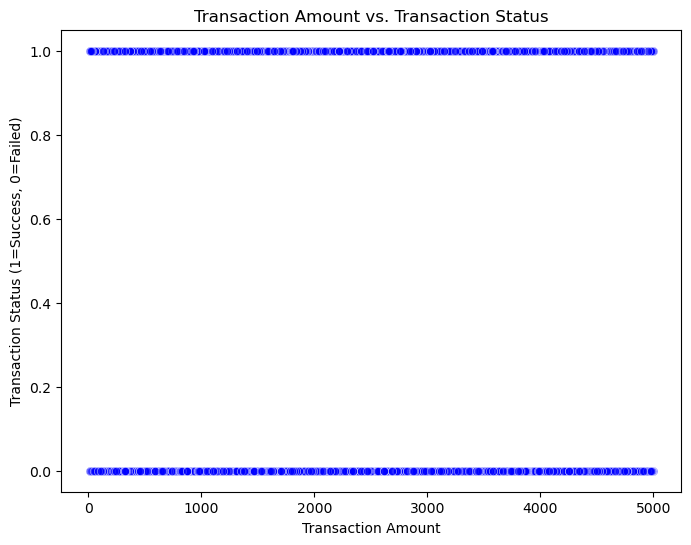

In [89]:
# Plot a scatter plot to see the relationship between transaction amount and status
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Transaction Amount', y='Transaction Status Numeric', alpha=0.6, color='blue')
plt.title('Transaction Amount vs. Transaction Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Status (1=Success, 0=Failed)')
plt.show()

# Identify the top 5 cities by total transaction amount.

In [93]:
top_cities = df.groupby('City')['Transaction Amount'].sum().sort_values(ascending=False).head(5)

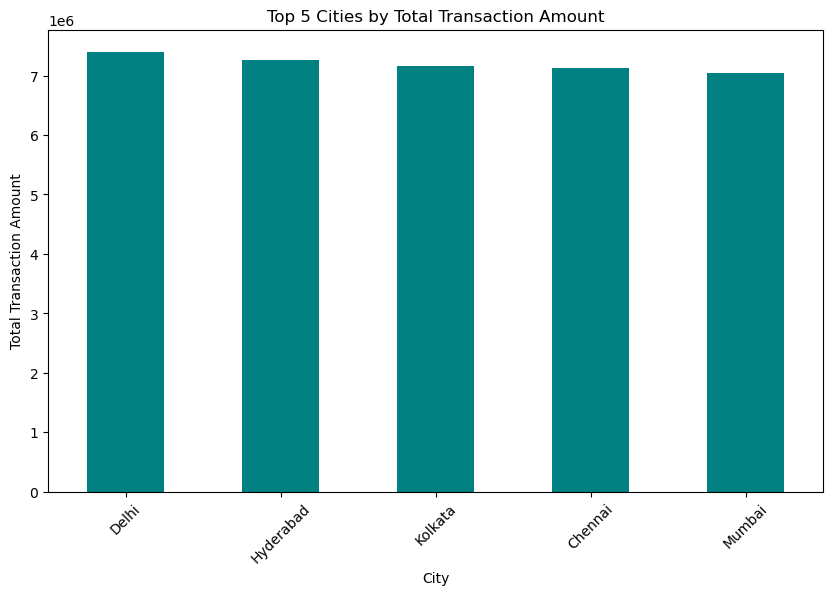

In [96]:
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar', color='teal')
plt.title('Top 5 Cities by Total Transaction Amount')
plt.xlabel('City')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

# What is the monthly distribution of transactions by type?

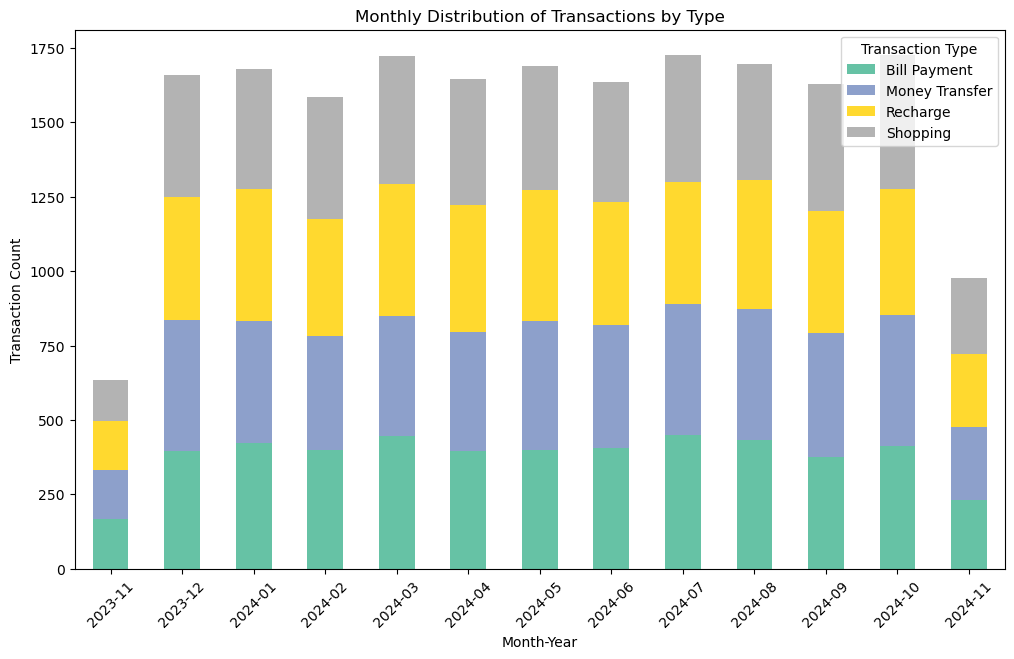

In [102]:
# Extract the month-year and group by month-year and transaction type
df['Month-Year'] = df['Transaction Date'].dt.to_period('M')
monthly_distribution = df.groupby(['Month-Year', 'Transaction Type'])['Transaction ID'].count().unstack()
monthly_distribution.plot(kind='bar', stacked=True, figsize=(12,7), cmap='Set2')
plt.title('Monthly Distribution of Transactions by Type')
plt.xlabel('Month-Year')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

# What is the count of failed transactions over time, and what patterns emerge?

In [103]:
failed_transactions = df[df['Transaction Status'] == 'Failed']

In [107]:
failed_transactions["Date"] = failed_transactions['Transaction Date'].dt.date

C:\Users\Hairav\AppData\Local\Temp\ipykernel_2188\2206894039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_transactions["Date"] = failed_transactions['Transaction Date'].dt.date


In [109]:
failed_transactions_count = failed_transactions.groupby('Date')['Transaction ID'].count()

In [110]:
failed_transactions_count

Date
2023-11-19    18
2023-11-20    28
2023-11-21    23
2023-11-22    21
2023-11-23    18
              ..
2024-11-14    14
2024-11-15    18
2024-11-16    17
2024-11-17    17
2024-11-18    13
Name: Transaction ID, Length: 366, dtype: int64

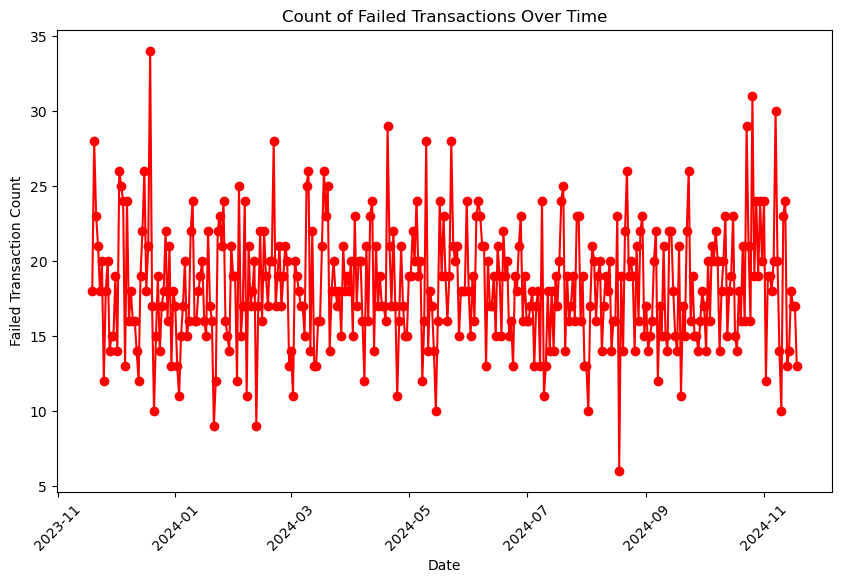

In [111]:
plt.figure(figsize=(10,6))
failed_transactions_count.plot(kind='line', color='red', marker='o')
plt.title('Count of Failed Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Failed Transaction Count')
plt.xticks(rotation=45)
plt.show()

# Key Insights and Business Implications:
Payment Method Preferences: A strong dominance of UPI and Wallet payments indicates that users prefer quick and digital modes of payment. The business can leverage this by integrating more UPI-related offers and incentivizing Wallet-based transactions.

Transaction Failure Insights: The weak correlation between transaction amount and failure suggests that the failure rate may be linked to external factors, like network issues or technical failures, which need to be mitigated through system improvements.

Regional Insights: High transaction volumes in cities like Delhi, Pune, and Mumbai suggest that marketing efforts and regional focus should prioritize these locations.

Transaction Trends: Monthly analysis shows fluctuations in transaction types, helping in planning for seasonal promotions or operational adjustments, especially during peak transaction periods like recharges.

System Reliability: Identifying spikes in failed transactions over time provides an opportunity to improve infrastructure and address potential downtime issues during peak hours or high-load events.



# Conclusion:
This project successfully provided a comprehensive analysis of online transaction data, offering valuable insights into payment behavior, regional trends, and transaction performance. The findings not only offer strategic directions for improving payment methods and addressing failures but also suggest areas for targeted marketing and system optimizations.

